This file allows the user to reproduce Table 1, Fig 3, and Fig 4 from the paper "MAGNets: Model AGgregation and reduction of water distribution Networks."

In [6]:
# Make sure this folder contains the "networks" folder with the .inp files

# Import libraries
import magnets as mg
import wntr 
import time
import numpy as np
import pandas as pd
import networkx.drawing.nx_pylab as nxp
import matplotlib.pyplot as plt

### 1. Reproduce Table 1.

In [7]:
# Define list of test networks
network_list = ['Net1.inp', 'Net2.inp', 'Net3 ND.inp', 'ky1.inp', 'ky2.inp', 'ky3.inp', 'ky4.inp', 'ky5.inp', 'ky6.inp', 'ky7.inp', 'ky8.inp', 'bwsn2.inp']

# List of "best" operating points for each network (operating point that results in lowest maximum percentage error for each network)
op_pt_list = [7, 16, 3, 9, 13, 5, 0, 32, 38, 24, 14, 35]

# Initialize dictionary to hold results
results_dict = {'Network': network_list,
                'Number of Junctions in Original Model': [], 
                'Number of Junctions in Reduced Model': [],
                'Reduction Time [s]': [],
                'Maximum Error [%]': []}
                               
# Iterate through each network
for inp_file in network_list:
    
    op_pt = op_pt_list[network_list.index(inp_file)]
    
    # Find EPS results for original model
    wn = wntr.network.WaterNetworkModel('networks/' + inp_file)
    sim = wntr.sim.EpanetSimulator(wn)
    results = sim.run_sim()

    # Call model reduction function and find EPS results
    t1 = time.time()
    wn2 = mg.reduction.reduce_model('networks/' + inp_file, op_pt)
    t2 = time.time()
    sim2 = wntr.sim.EpanetSimulator(wn2)
    results2 = sim2.run_sim()
           
    # Determine which nodes remain in the reduced model
    junc_names = wn2.junction_name_list
    num_junc = wn2.num_junctions
    
    # Find maximum percentage deviation of node heads in reduced model from original model over entire simulation duration
    error_each_node = []
    max_error_each_node = []
    
    for i in range(num_junc):
        error_each_node.append(abs((results.node['head'].loc[:,junc_names[i]]
    -results2.node['head'].loc[:,junc_names[i]])/results.node['head'].loc[:,junc_names[i]])*100)
        max_error_each_node.append(np.amax(np.array(error_each_node)))
                                
    max_error_op_pt = np.argmax(max_error_each_node)
    largest_error = max_error_each_node[max_error_op_pt]
    
    results_dict['Number of Junctions in Original Model'].append(wn.num_junctions)
    results_dict['Number of Junctions in Reduced Model'].append(wn2.num_junctions)
    results_dict['Reduction Time [s]'].append(t2 - t1)
    results_dict['Maximum Error [%]'].append(largest_error)
        
# Store results dictionary as dataframe and display results
results_df = pd.DataFrame.from_dict(results_dict)
print(results_df)

# Store the results in a csv file
results_df.to_csv('results.csv')  

C:\Software\Anaconda\lib\site-packages\wntr\epanet\io.py:2082: UserWarning: Not all curves were used in "networks/bwsn2.inp"; added with type None, units conversion left to user
  warnings.warn('Not all curves were used in "{}"; added with type None, units conversion left to user'.format(self.wn.name))
C:\Software\Anaconda\lib\site-packages\wntr\epanet\io.py:2082: UserWarning: Not all curves were used in "networks/bwsn2.inp"; added with type None, units conversion left to user
  warnings.warn('Not all curves were used in "{}"; added with type None, units conversion left to user'.format(self.wn.name))


        Network  Number of Junctions in Original Model  \
0      Net1.inp                                      9   
1      Net2.inp                                     35   
2   Net3 ND.inp                                     92   
3       ky1.inp                                    791   
4       ky2.inp                                    811   
5       ky3.inp                                    269   
6       ky4.inp                                    959   
7       ky5.inp                                    420   
8       ky6.inp                                    543   
9       ky7.inp                                    481   
10      ky8.inp                                   1325   
11    bwsn2.inp                                  12523   

    Number of Junctions in Reduced Model  Reduction Time [s]  \
0                                      2            0.121036   
1                                      3            0.147909   
2                                      7            0

### 2. Reproduce Figure 3.

[4052998.9973, 4081658.7427000003, 4052998.9973, 4081658.7427000003]

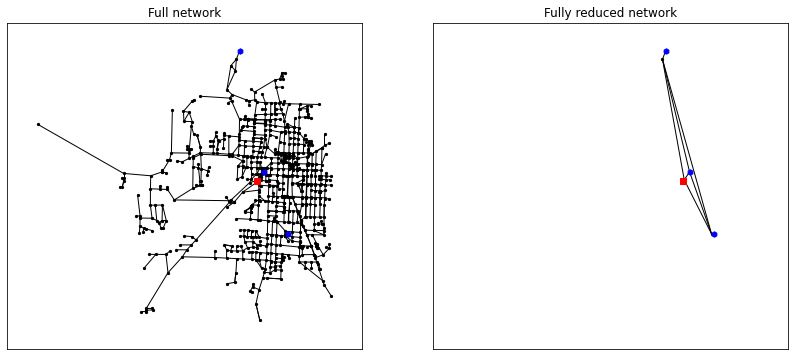

In [8]:
# Import KY2 inp file
inp_file = 'networks/ky2.inp'

# Define plotting function
def plot_network(wn, title, num):

    G = wn.get_graph()
    G_edge_list = list(G.edges())

    pos_dict = {}
    for node_name, node in wn.nodes():
        pos_dict[node_name] = node.coordinates
                  
    plt.sca(ax[num])
    nxp.draw_networkx_nodes(G, pos_dict, node_size = 5, node_color = 'k', ax = ax[num])
    nxp.draw_networkx_nodes(G, pos_dict, nodelist = wn.tank_name_list, node_size = 30, node_color = 'b', node_shape = 'h', ax = ax[num])
    nxp.draw_networkx_nodes(G, pos_dict, nodelist = wn.reservoir_name_list, node_size = 30, node_color = 'r', node_shape = 's', ax = ax[num])
    nxp.draw_networkx_edges(G, pos_dict, edgelist = G_edge_list, edge_color = 'k', width = 1, arrows = False, ax = ax[num])
    ax[num].set_axis_off
    ax[num].set_title(title)
    
# Reduce KY2 inp file 
    
# Extract hyraulic simulation results for original model
wn = wntr.network.WaterNetworkModel(inp_file)

# Reduce model with operating point = 0
wn2 = mg.reduction.reduce_model(inp_file)

# Plot the original and reduced networks
fig, ax = plt.subplots(1, 2, figsize=(14,6))
plot_network(wn, 'Full network', 0)
plot_network(wn2, 'Fully reduced network', 1)
plt.setp(ax, ylim=ax[0].get_ylim())
plt.setp(ax, xlim=ax[0].get_xlim())
plt.show()

### 3. Reproduce Figure 4. 

Text(0.5, 0, 'Time [$hr$]')

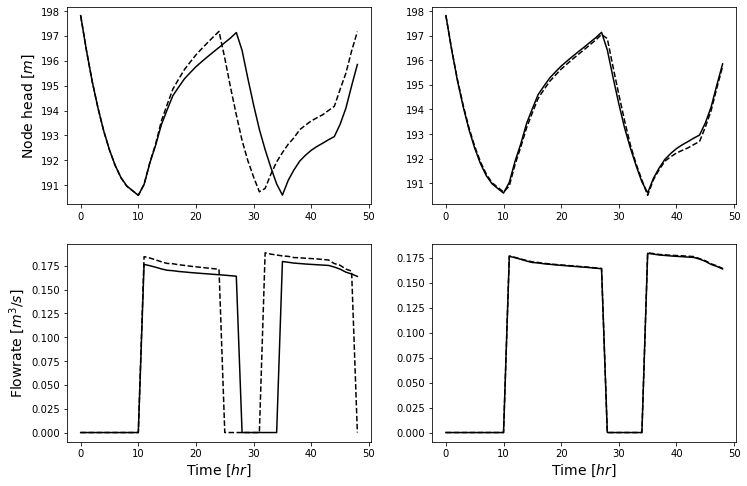

In [9]:
# Import KY2 inp file
inp_file = 'networks/ky2.inp'
op_pt_1 = 0
op_pt_2 = 13

# Reduce KY2 inp file with two different operating points and extract extended period simulation results
    
# Extract hyraulic simulation results for original model
wn = wntr.network.WaterNetworkModel(inp_file)
sim = wntr.sim.EpanetSimulator(wn)
results = sim.run_sim()

tank2_level = results.node['head'].loc[:,'T-2']
pump1_flow = results.link['flowrate'].loc[:,'~@Pump-1']

# Reduce model with operating point = 0
wn2 = mg.reduction.reduce_model(inp_file, op_pt_1)
sim2 = wntr.sim.EpanetSimulator(wn2)
results2 = sim2.run_sim()

# Reduce model with operating point = 13
wn3 = mg.reduction.reduce_model(inp_file, op_pt_2)
sim3 = wntr.sim.EpanetSimulator(wn3)
results3 = sim3.run_sim()

# Extract simulation results for tank T-2 and pump ~@Pump-1
tank2_level_red_0 = results2.node['head'].loc[:,'T-2']
tank2_level_red_13 = results3.node['head'].loc[:,'T-2']

pump1_flow_red_0 = results2.link['flowrate'].loc[:,'~@Pump-1']
pump1_flow_red_13 = results3.link['flowrate'].loc[:,'~@Pump-1']


duration = len(tank2_level)
x_values = np.linspace(0,duration-1,duration) 

# Plot tank heads and pump flow rates to compare

fig, ax = plt.subplots(2,2 , figsize=(12,8))
ax[0,0].plot(x_values, tank2_level, 'k')
ax[0,0].plot(x_values, tank2_level_red_0, 'k--')
ax[0,0].set_ylabel('Node head [$m$]',fontsize = 14)

ax[1,0].plot(x_values, pump1_flow, color = 'k')
ax[1,0].plot(x_values, pump1_flow_red_0, 'k--')
ax[1,0].set_ylabel('Flowrate [$m^3/s$]',fontsize=14)
ax[1,0].set_xlabel('Time [$hr$]',fontsize = 14)

ax[0,1].plot(x_values, tank2_level, 'k')
ax[0,1].plot(x_values, tank2_level_red_13, 'k--')

ax[1,1].plot(x_values, pump1_flow, color = 'k')
ax[1,1].plot(x_values, pump1_flow_red_13, 'k--')
ax[1,1].set_xlabel('Time [$hr$]',fontsize = 14)
plt.show()